# Simple Linear Regression

In [35]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [36]:
df = pd.read_csv(url)
# df.head()
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
135,2014,BMW,Z4 sDRIVE28i,TWO-SEATER,2.0,4,A8,Z,10.8,7.1,9.1,31,209
590,2014,JEEP,PATRIOT,SUV - SMALL,2.0,4,M5,X,10.2,7.8,9.1,31,209
228,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413
205,2014,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,X,13.9,9.6,12.0,24,276
565,2014,JAGUAR,XKR CONVERTIBLE,MINICOMPACT,5.0,8,AS6,Z,15.9,10.9,13.7,21,315


In [10]:
# Understand the data
# FuelConsumption.csv:
# You will use a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source.
# 
# MODEL YEAR e.g. 2014
# MAKE e.g. VOLVO
# MODEL e.g. S60 AWD
# VEHICLE CLASS e.g. COMPACT
# ENGINE SIZE e.g. 3.0
# CYLINDERS e.g 6
# TRANSMISSION e.g. AS6
# FUEL TYPE e.g. Z
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
# FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
# FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
# CO2 EMISSIONS (g/km) e.g. 182
# Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.

# Explore the data

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
# You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG.
# 
# The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.
# 
# MODELYEAR has 0 standard deviation, and thus has no interesting information content.

# We can see correlation of data before select feature

In [37]:
# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                          MODELYEAR  ENGINESIZE  CYLINDERS  \
MODELYEAR                       NaN         NaN        NaN   
ENGINESIZE                      NaN    1.000000   0.934011   
CYLINDERS                       NaN    0.934011   1.000000   
FUELCONSUMPTION_CITY            NaN    0.832225   0.796473   
FUELCONSUMPTION_HWY             NaN    0.778746   0.724594   
FUELCONSUMPTION_COMB            NaN    0.819482   0.776788   
FUELCONSUMPTION_COMB_MPG        NaN   -0.808554  -0.770430   
CO2EMISSIONS                    NaN    0.874154   0.849685   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
MODELYEAR                                  NaN                  NaN   
ENGINESIZE                            0.832225             0.778746   
CYLINDERS                             0.796473             0.724594   
FUELCONSUMPTION_CITY                  1.000000             0.965718   
FUELCONSUMPTION_HWY                   0.965718             1.000000   
FUELCONSUMPTION

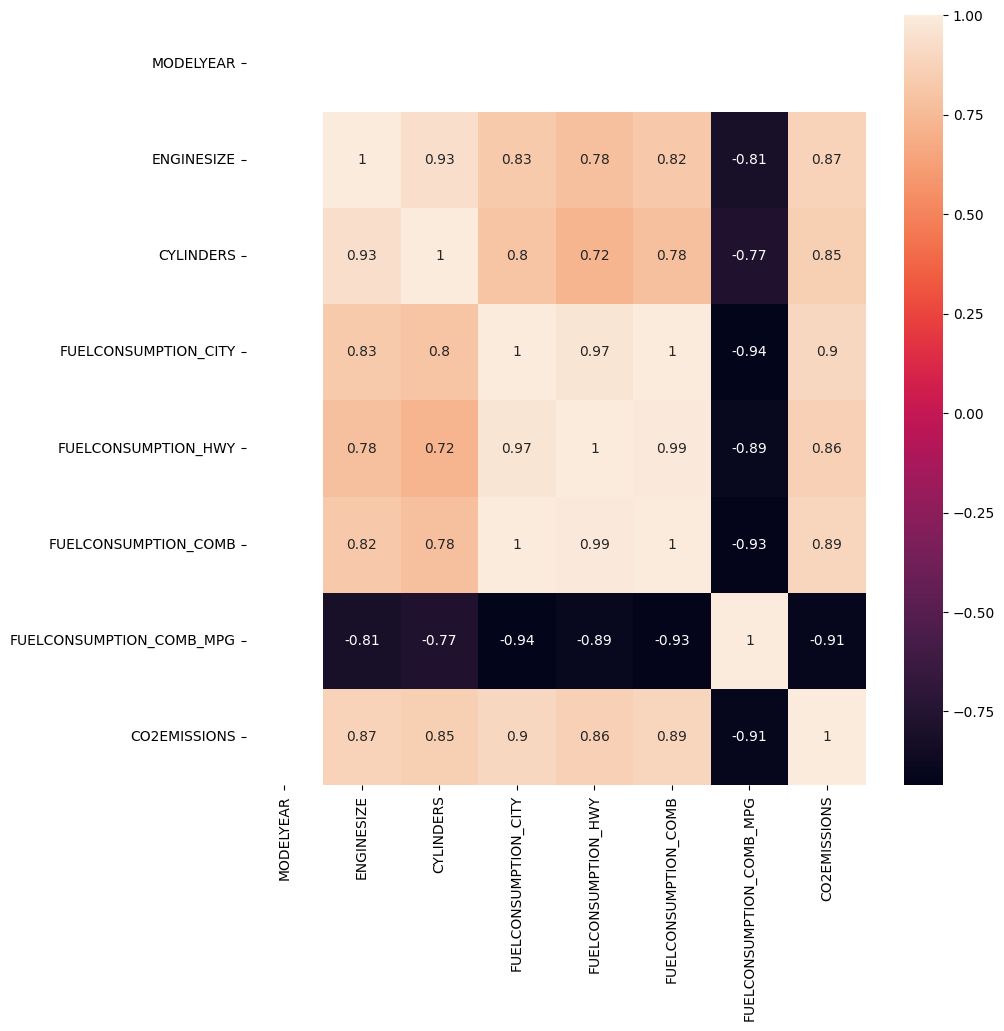

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True);

# Feature Selection
* Select a few features that might be indicative of CO2 emission to explore more

In [13]:
# Create new Feature using below column
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
764,3.0,6,10.3,278
416,3.7,6,10.2,235
1027,2.0,4,9.8,225
634,5.2,10,15.7,361
797,1.6,4,8.5,196
860,5.6,8,17.3,398
136,2.0,4,8.7,200
398,3.5,6,12.1,278
606,1.6,4,9.8,225


# Visualize features
* Consider the histograms for each of these features.

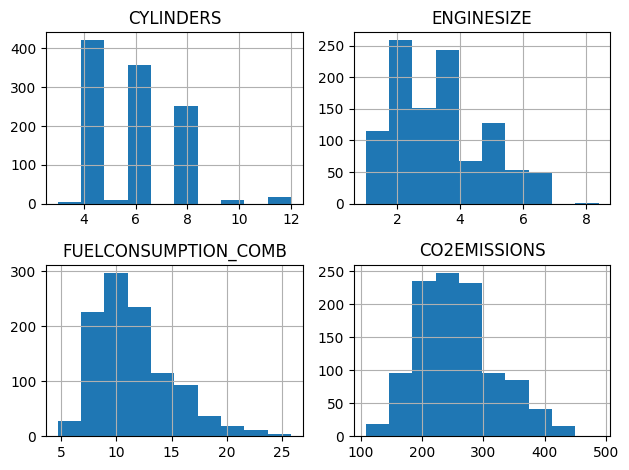

In [17]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.tight_layout()
plt.show()

In [ ]:
# As we can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.
# As we might expect, combined fuel consumption and CO2 emission have very similar distributions.
# Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.

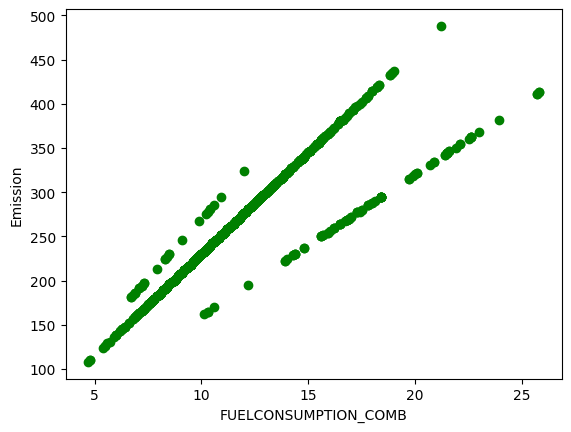

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [ ]:
# This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

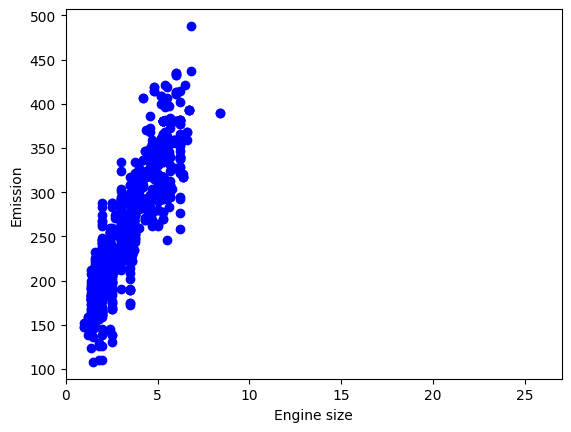

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [ ]:
# Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.

# Plot CYLINDER against CO2 Emission, to see how linear their relationship is.

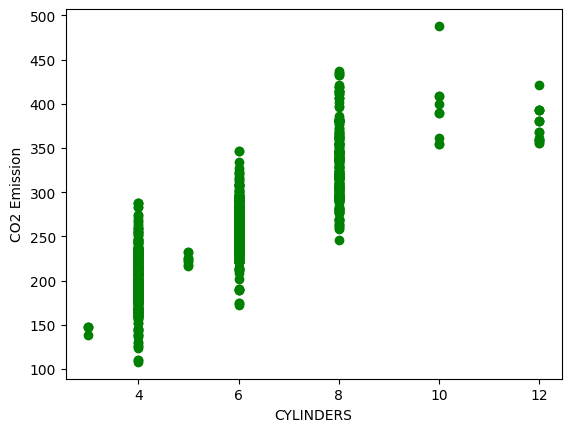

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

# Extract the input feature and labels from the dataset

* Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.
* You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.

In [24]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

# Create train and test datasets

In [25]:
# # Next, you will split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.
# 
# Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.
# 
# Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# The outputs are one-dimensional NumPy arrays or vectors.
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

# Build a simple linear regression model

In [31]:
from sklearn.linear_model import LinearRegression

# create a model object
regressor = LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873
